In [112]:
# /usr/bin/python
# -*- encoding:utf-8 -*-
%matplotlib inline
import xgboost as xgb
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]
if __name__ == "__main__":
    path = "iris.data"
    data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
    # 将数据集拆分成feature与label两部分 
    x, y = np.split(data, (4, ), axis=1)

    # 将特征与标签数据分别拆分成训练集与测试集
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=50)
    # 将训练集与测试集变成DMtrix的数据格式
    train = xgb.DMatrix(x_train, label=y_train)
    test = xgb.DMatrix(x_test, label=y_test)
    watch_list = [(test, 'eval'), (train, 'train')]
    # 设置参数
    param = {'max_depth': 3,
             'eta': 1,
             'silent': 0,
             'objective': 'multi:softmax',
             'num_class': 3}
    num_round = 2

    # 训练模型
    bsg = xgb.train(param, train, num_round, evals=watch_list,early_stopping_rounds=100)

    # 预测模型
    y_hat = bsg.predict(test)

     # 计算误差
    result = y_test.reshape(1, -1) == y_hat
    print ("xgboost:\t", float(np.sum(result)) / len(y_hat))
    print ('END.....\n')

    # =====================================================#
    # 逻辑回归
    lr = LogisticRegression(penalty='l2')
    lr.fit(x_train, y_train.ravel())
    y_hat2 = lr.predict(x_test)

    # 计算误差
    result2 = y_test.reshape(1, -1) == y_hat2
    print( "logist:\t", float(np.sum(result2)) / len(y_hat2))
    print( 'END.....\n')

[0]	eval-merror:0.02	train-merror:0.02
Multiple eval metrics have been passed: 'train-merror' will be used for early stopping.

Will train until train-merror hasn't improved in 100 rounds.
[1]	eval-merror:0.02	train-merror:0.02
('xgboost:\t', 0.98)
END.....

('logist:\t', 0.88)
END.....



In [192]:
#-*- coding=utf-8 -*-
import pandas as pd
df1=pd.read_csv('moviesInfo.txt',sep=',',header=0)
df1 = df1.drop(['CBOO上的ID','电影名','豆瓣总评论','豆瓣评分'], axis=1)
df1.loc[:,['总票房', '豆瓣首周评论']] = df1.loc[:,['豆瓣首周评论', '总票房']].values
df1.columns = ['首周场均人次', '首周票房', '豆瓣首周评论', '总票房']
mydf=df1
mydf=mydf.dropna()
mydf=mydf.drop_duplicates(subset="总票房",keep="first")
mydf=mydf.sort_values(by="总票房", ascending=False)
print mydf.shape
mydf.to_csv('moviesInfo.txt')

(369, 4)


In [207]:
df1=pd.read_csv('moviesInfo.txt',sep=',',header=0)
df1.columns = ['A', 'B', 'C', 'D','E']
df1=df1.drop('A', axis=1)
df1.columns = ['首周场均人次', '首周票房', '豆瓣首周评论', '总票房']
df1=df1.astype(int)
df1.to_csv('moviesInfo.txt',index=False)

In [51]:
# /usr/bin/python
# -*- encoding:utf-8 -*-
%matplotlib inline
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import DataFrame
from patsy import dmatrices
import pickle
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)
df1=pd.read_csv('moviesInfo.txt',sep=',',header=0)
df1 = df1.drop(['CBOO上的ID','电影名','豆瓣总评论','豆瓣评分'], axis=1)
df1.loc[:,['总票房', '豆瓣首周评论']] = df1.loc[:,['豆瓣首周评论', '总票房']].values
df1.columns = ['首周场均人次', '首周票房', '豆瓣首周评论', '总票房']
#df1.to_csv('movieBox.csv')


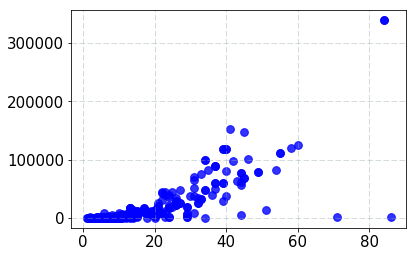

[ 2128.19234411]
-17644.8780402


0.57530415666083812

In [152]:
from sklearn import linear_model
from sklearn import cross_validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = np.array(df1[['首周场均人次']])
Y = np.array(df1['label'])
plt.scatter(X,Y,60,color='blue',marker='o',linewidth=1,alpha=0.8)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.show()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
clf = linear_model.LinearRegression()
clf.fit (X_train,y_train)
print(clf.coef_)
print(clf.intercept_)
clf.score(X_train,y_train)

Predicted value:  [[ 37002.09833947]]


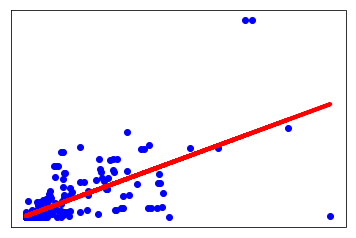

Predicted value:  [[ 64824.51395851]]


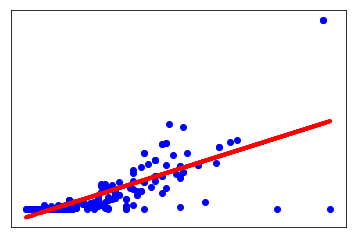

Predicted value:  [[ 146540.31801001]]


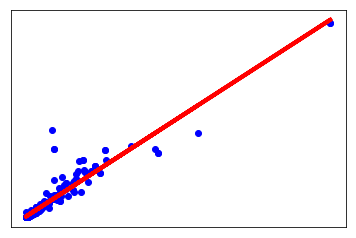

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
X = train_xy.drop(['label'],axis=1)

def getdata(m):
    X_parameter = []
    Y_parameter = []
    for label in df1['label']:
        Y_parameter.append(float(label))
    for train in df1[m]:
        X_parameter.append((train))
    X_parameter=np.array(X_parameter).reshape(-1,1)
    Y_parameter=np.array(Y_parameter).reshape(-1,1)    
    return X_parameter,Y_parameter   
def show_linear_line(X_parameters,Y_parameters):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()    
def linear_model_main(X_parameters,Y_parameters,predict_value):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions    

X,Y=getdata('豆瓣首周评论')
result = linear_model_main(X,Y,745)
#print "Intercept value " , result['intercept']
#print "coefficient" , result['coefficient']
print "Predicted value: ",result['predicted_value']
show_linear_line(X,Y)


X,Y=getdata('首周场均人次')
result = linear_model_main(X,Y,40)
#print "Intercept value " , result['intercept']
#print "coefficient" , result['coefficient']
print "Predicted value: ",result['predicted_value']
show_linear_line(X,Y)

X,Y=getdata('首周票房')
result = linear_model_main(X,Y,76836)
#print "Intercept value " , result['intercept']
#print "coefficient" , result['coefficient']
print "Predicted value: ",result['predicted_value']
show_linear_line(X,Y)

('MSE:', 102539341.58140431)
('RMSE:', 10126.171121475496)
('predict now', array([ 310877.27]))


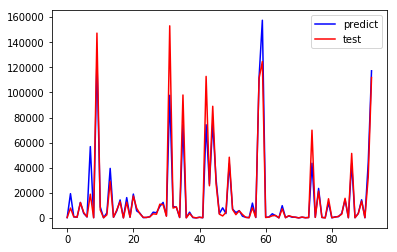

In [69]:
#随机森林算法预测电影票房
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('moviesInfo.txt',sep=',',header=0)
x = data[['首周场均人次', '首周票房', '豆瓣首周评论']]
y = data[['总票房']]
x = x.values.astype(int)
y = y.values.astype(int)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,oob_score=True)
clf = clf.fit(x_train,y_train.ravel())
y_pred=clf.predict(x_test)
#模型均值方差和均根方差
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test, y_pred)
print ("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",RMSE)
#自测数据
xtest=[[84,181744,3083]]
print("predict now",clf.predict(xtest))
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.show()


In [70]:
len(y_pred)

93

[0]	eval-rmse:16206	train-rmse:12771.7
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 100 rounds.
[1]	eval-rmse:12215.6	train-rmse:6872.13
[2]	eval-rmse:11847.5	train-rmse:3741.16
('MSE:', 140363197.36017939)
('RMSE:', 11847.497514672852)


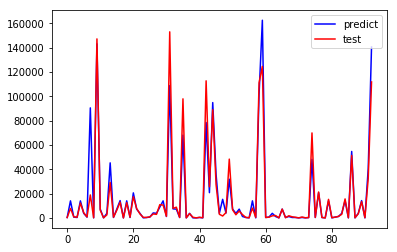

In [67]:
#xgboost预测电影票房
%matplotlib inline
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('moviesInfo.txt',sep=',',header=0)
data.columns = ['A', 'B', 'C', 'D']
x = data[['A', 'B', 'C']]
y = data[['D']]
x = x.values.astype(int)
y = y.values.astype(int)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)
# 将训练集与测试集变成DMtrix的数据格式
train = xgb.DMatrix(x_train, label=y_train)
test = xgb.DMatrix(x_test, label=y_test)
watch_list = [(test, 'eval'), (train, 'train')]
# 设置参数
param = {'max_depth':7, 'eta': 1, 'silent': 0, 'objective': "reg:linear"}
num_round = 3
# 训练模型
bsg = xgb.train(param, train, num_round, evals=watch_list,early_stopping_rounds=100)
# 保存模型
#bst.save_model('xgbMovie.model')
# 预测模型
y_hat = bsg.predict(test)
#模型均值方差和均根方差
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test, y_hat)
print ("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_hat))
print ("RMSE:",RMSE)
plt.figure()  
plt.plot(range(len(y_hat)),y_hat,'b',label="predict")  
plt.plot(range(len(y_hat)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.cross_validation import train_test_split

import time 
start_time = time.time()

#读入数据
train = pd.read_csv("Digit_Recognizer/train.csv")
tests = pd.read_csv("Digit_Recognizer/test.csv") 

params={
'booster':'gbtree',
'objective': 'multi:softmax', #多分类的问题
'num_class':10, # 类别数，与 multisoftmax 并用
'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
'max_depth':12, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'min_child_weight':3, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.007, # 如同学习率
'seed':1000,
'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}

plst = list(params.items())
num_rounds = 5000 # 迭代次数

train_xy,val = train_test_split(train, test_size = 0.3,random_state=1)
#random_state is of big influence for val-auc
y = train_xy.label
X = train_xy.drop(['label'],axis=1)
val_y = val.label
val_X = val.drop(['label'],axis=1)

xgb_val = xgb.DMatrix(val_X,label=val_y)
xgb_train = xgb.DMatrix(X, label=y)
xgb_test = xgb.DMatrix(tests)


watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

# training model 
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=100)

model.save_model('./model/xgb.model') # 用于存储训练出的模型
print "best best_ntree_limit",model.best_ntree_limit 

print "跑到这里了model.predict"
preds = model.predict(xgb_test,ntree_limit=model.best_ntree_limit)

np.savetxt('xgb_submission.csv',np.c_[range(1,len(tests)+1),preds],delimiter=',',header='ImageId,Label',comments='',fmt='%d')

#输出运行时长
cost_time = time.time()-start_time
print "xgboost success!",'\n',"cost time:",cost_time,"(s)"

     首周场均人次    首周票房  豆瓣首周评论     总票房
0        84  181744    3083  339212
1        68  135212    1009  266503
2        61   25710     643  175259
3        69   55978    1693  165592
4        41   15548    3577  153033
5        45  103040    1387  147222
6        60   62796    1686  124632
7        58   76836     745  120101
8        40   16562    2244  118438
9        39   47221    1565  117454
10       40   50289     811  114973
11       44   40735     493  112741
12       55   78628     501  111818
13       50   60975     962  111180
14       42   12341    1851  104851
15       46   47875     998  100450
16       34   33978    1249  100200
17       42   31949    1143   97938
18       37   41042     433   88949
19       54   34798    1014   82557
20       35   31178    1192   81424
21       40   38587    1379   80289
22       49   35550    1207   78681
23       44   44277     521   77028
24       56   29856     420   75792
25       33   30047    1818   75169
26       34   31837    1501 

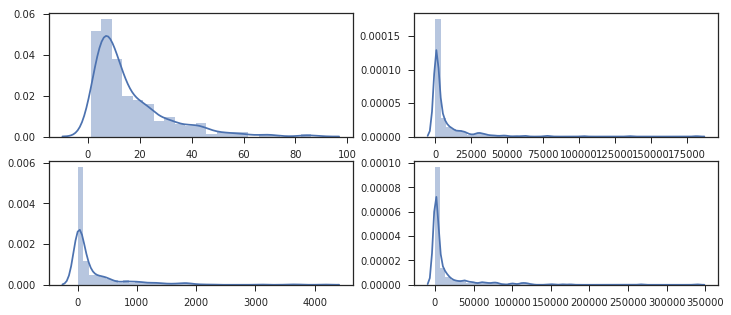

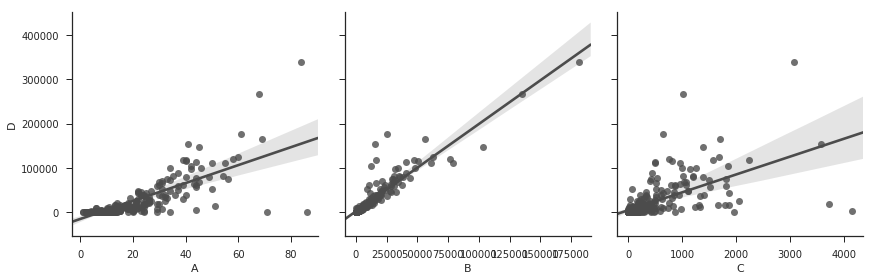

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mydf=pd.read_csv('moviesInfo.txt',sep=',',header=0)
print mydf
mydf.columns = ['首周场均人次', '首周票房', '豆瓣首周评论', '总票房']
mydf=mydf.astype(int)
fig=plt.figure(figsize=(12,5))
p1=fig.add_subplot(221)
sns.distplot(mydf['首周场均人次'].values)
p2=fig.add_subplot(222)
sns.distplot(mydf['首周票房'].values)
p3=fig.add_subplot(223)
sns.distplot(mydf['豆瓣首周评论'].values)
p4=fig.add_subplot(224)
sns.distplot(mydf['总票房'].values)
sns.plt.show()
mydf.columns = ['A', 'B', 'C', 'D']
g = sns.PairGrid(mydf, y_vars=['D'], x_vars=['A', 'B','C'], size=4)
g.map(sns.regplot, color=".3")



(276, 1) (276,) (93, 1) (93,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
1521.42577188 [ 51.44369863]
93 93
RMSE by hand: 35409.0822072


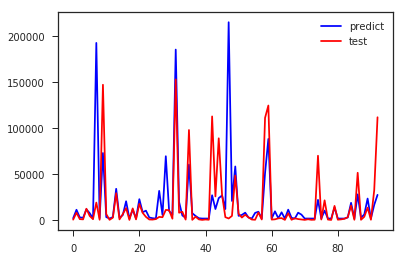

In [324]:
from sklearn.cross_validation import train_test_split  #这里是引用了交叉验证  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
import numpy as np  
y=mydf["D"]
X=mydf.drop(['D','A','B'],axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
print X_train.shape,y_train.shape,X_test.shape, y_test.shape    
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print model
print linreg.intercept_ ,linreg.coef_   

y_pred = linreg.predict(X_test)  
print len(y_pred),len(y_test) 
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/len(y_pred))  
# calculate RMSE by hand  
print "RMSE by hand:",sum_erro  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.show()

In [400]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression  
y=mydf["D"]
X=mydf.drop(['D'],axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
print X_train.shape,y_train.shape,X_test.shape, y_test.shape    
clf_l2_LR = LogisticRegression(C=1, penalty='l1', tol=1e-6)
model1=clf_l1_LR.fit(X_train, y_train)
model2=clf_l2_LR.fit(X_train, y_train)

y_pred = model1.predict(X_test)  
print len(y_pred),len(y_test) 
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/len(y_pred))  
# calculate RMSE by hand  
print "RMSE by hand:",sum_erro  


(276, 3) (276,) (93, 3) (93,)
93 93
RMSE by hand: 24629.7746025
24629.7746025


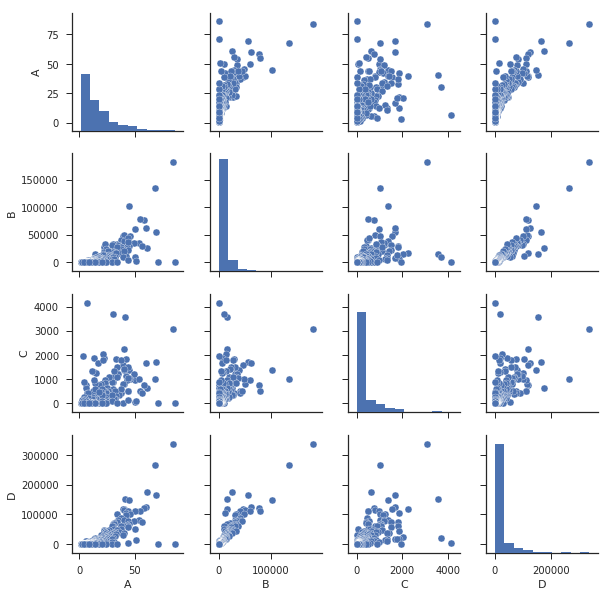

In [270]:
sns.pairplot(mydf,size=2.1)
sns.plt.show()